HAO WANG

In order to successfully complete this assignment, you must follow all instructions in this notebook and upload your edited ipynb file with your answers on or before **11:59pm on Friday Jan. 25th**.

**Please read though the entire project before starting!**



# Homework 1: Iterative Methods


<img src="http://www.impawards.com/2014/posters/edge_of_tomorrow_ver13.jpg">

In this homework, you will study and compare the convergence rates of two different iterative solvers (Jacobi and Gauss-Seidel). These solvers are described in details in Section 7.4 of the textbook.


- Part 1: A General Jacobi Method
- Part 2: Matrix Testing
- Part 3: Adding Stopping Conditions
- Part 4: Gauss-Seidel Method


----
# Part 1: A General Jacobi Method

Consider the following system of linear equations:

$$ 6x + 2y - 2z = -2$$
$$ x + 4y + z = 4$$
$$ 2x + 2y + 5z = 32$$


##  Solve using Numpy

Let's find the solution to the above system of linear equation using the ```numpy.linalg.solv``` function. 

&#9989; <font color=red>**DO THIS:**</font>  create a $3 \times 3$ ```Numpy``` matrix for the left hand side of the above system of equations (Call this $A$ matrix):

In [1]:
import numpy as np
A = np.matrix([[6,2,-2],[1,4,1],[2,2,5]])

&#9989; **DO THIS:** Create a $3 \times 1$ ```Numpy``` matrix for the right hand side of the above system of equations (Call this $b$):

In [4]:
b = np.matrix([[-2],[4],[32]])

&#9989; **DO THIS:** Run the ```numpy.linalg.solv``` function on $A$ and $b$ to find a solution for $x$, $y$, and $z$

In [5]:
x = np.linalg.solve(A,b)
print(x)

[[ 2.]
 [-1.]
 [ 6.]]


## Verify Results using Sympy 

Let's verify the above solution using symbolic methods.  In this case, we are going to convert the problem into an augmented matrix and solve it by putting it in it's reduced row echelon form.

&#9989; <font color=red>**DO THIS:**</font> Create a $3 \times 4$ augmented matrix for the above system of equations:

In [6]:
import sympy as sym
sym.init_printing(use_unicode=True)

M = sym.Matrix([[6,2,-2,-2],[1,4,1,4],[2,2,5,32]])
print(M)




Matrix([[6, 2, -2, -2], [1, 4, 1, 4], [2, 2, 5, 32]])


**DO THIS:** Run the ```rref``` function on your augmented matrix to find a solution for $x,y$ and $z$. 

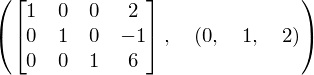

In [7]:
M = sym.Matrix([[6,2,-2,-2],[1,4,1,4],[2,2,5,32]])
M.rref()



## Solve using Jacobi

The following code defines a function that can take an arbitrary augmented matrix as an input and solve the system with the Jacobi method using the same basic approach we used in class. 

In [8]:
# Some basid libraries we are using
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

In [73]:
def jacobi(m,numiter=100):
    
    #Number of rows determins the number of variables
    numvars = m.shape[0]
    
    #construct array for final iterations
    history = np.zeros((numvars,numiter))
    i = 1
    while(i < numiter): #Loop for numiter
      
        for v in range(numvars): # Loop over all variables
            
            current = m[v,numvars] # Start with left hand side (augmented side of matrix)
            for col in range(numvars): #Loop over columns
                if v != col: # Don't count colume for current variable
                    current = current - (m[v,col]*history[col, i-1]) #subtract other guesses form previous timestep
            current = current/m[v,v] #divide by current variable coefficent

            history[v,i] = current #Add this answer to the rest
        i = i + 1 #iterate
    
    #plot each variable
    for v in range(numvars):
        plt.plot(history[v,: i]);
    return history[:,i-1]

array([ 2., -1.,  6.])

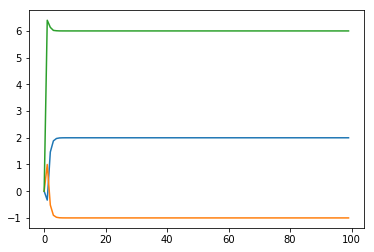

In [74]:
jacobi(M)

&#9989; <font color=red>**QUESTION:**</font> Inspect the above graph. Approximately how many iterations did the jacobi method take to converge?

There are approximately 5 times iterations to coverge

## Big Problems

Now consider the following large augmented matrix:

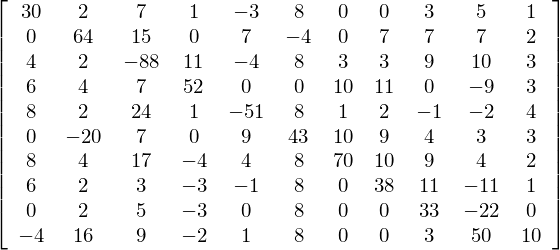

In [13]:
big_matrix = np.matrix([[30, 2,   7,   1, -3,  8, 0, 0, 3, 5, 1], 
                        [0,  64,  15,  0,   7,  -4, 0, 7, 7, 7, 2], 
                        [4,  2,   -88, 11, -4,  8, 3, 3, 9, 10, 3], 
                        [6,  4,   7,   52, 0,   0, 10, 11, 0, -9, 3], 
                        [8,  2,   24,  1, -51, 8, 1, 2, -1, -2, 4], 
                        [0,  -20, 7,   0,  9,  43, 10, 9, 4, 3, 3], 
                        [8,  4,   17,  -4,  4,  8, 70, 10, 9, 4, 2], 
                        [6,  2,   3,   -3, -1,  8, 0, 38, 11, -11, 1], 
                        [0,  2,   5,   -3,  0,  8, 0, 0, 33, -22, 0], 
                        [-4, 16,  9,   -2,  1,  8, 0, 0, 3, 50, 10]])
sym.Matrix(big_matrix)

&#9989; <font color=red>**QUESTION:**</font> Verify that the following matrix has a single solution by caclulating it's Reduced row Echelon form using SymPy:

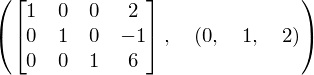

In [49]:
import sympy as sym
sym.init_printing(use_unicode=True)

M = sym.Matrix([[6,2,-2,-2],[1,4,1,4],[2,2,5,32]])
M.rref()

&#9989; <font color=red>**QUESTION:**</font>  Run the above Jacobi function on the ```big_matrix1```.

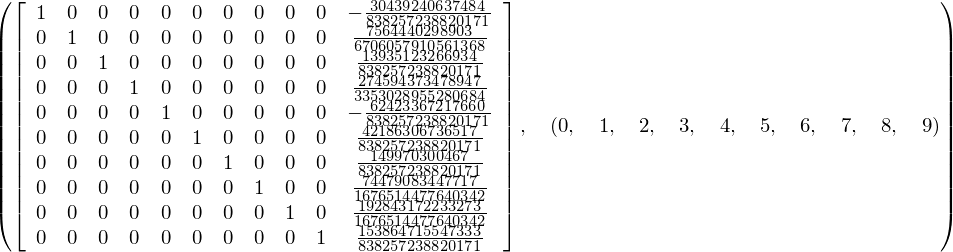

In [50]:
Q = sym.Matrix(big_matrix)
Q.rref()

array([-3.63124690e-02,  1.12808923e-03,  1.66238676e-02,  8.18944403e-02,
       -7.44680544e-02,  5.03262953e-02,  1.78983967e-04,  4.44250039e-02,
        1.15026133e-01,  1.83553106e-01])

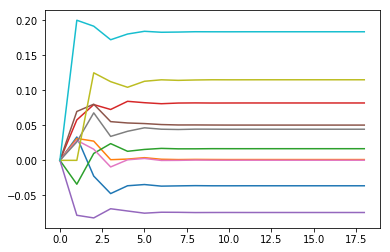

In [51]:
jacobi(big_matrix)

# Part 2: Matrix Testing

From Theorem 7.1 in the book, we know that the Jacobi method converges when the absolute value of the diagonal elements of each row **dominate** the sum of the absolute value for the other elements in the same row. 

&#9989; <font color=red>**DO THIS:**</font> Write a function (Lets call it ```checkJacobi```) that takes in a matrix as input and returns ```True``` if the matrix can be solved using the Jacobi method and ```False``` if it can not.  

**Note:** You can assume that the matrix is already put into a diagonally dominant form (i.e. do not try to figure out if you need to swap rows).

In [52]:
def checkJacobi(m):
    x = len(m)
    flag=1
    for i in range(x):
        if 2*abs(m[i,i]) <= np.sum(np.abs(m[i,:])):
            flag = 0

    if  flag == 0:
        return False

    return True

Lets test the matrix from above

In [53]:
checkJacobi(A)

True

In [54]:
checkJacobi(big_matrix)

False

The big_matrix does not satisfy the conidition, but Jacobi method still converges for this case. So this condition is sufficient  but not necessary.

&#9989; <font color=red>**QUESTION:**</font>  Come up with a new augmented matrix (let's call it $A1$) which represents a system of linear equations with a solution but fails the above ```checkJacobi``` test. 

In [55]:
A1 = np.matrix([[1,1,3,8],[7,2,9,3],[1,1,1,5]])


Run the following code to verify there is a solution to your equation by checking it's Reduced Row Echelon form:

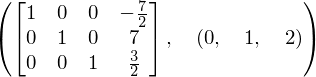

In [56]:
# This should return an identiy matrix on the right hand side
sym.Matrix(A1).rref()

Run the following code to verify that the system of equations is not row dominant. (i.e. your checkJacobi function should return false)

In [57]:

# This should return False
checkJacobi(A1)

False

Run the Jacobi function defined above on your new function ($A1$).

array([1.20533417e+58, 2.08917767e+58, 8.53844989e+57])

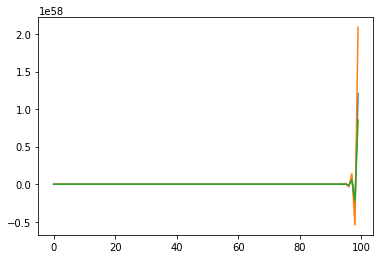

In [58]:
jacobi(A1)

&#9989; <font color=red>**QUESTION:**</font>  Describe in words how the Jacobi method responds to your $A1$ matrix.

The jacobi method responds to the A1 matrix is  diffuseness 

# Step 3: Adding Stopping Conditions

&#9989; <font color=red>**DO THIS:**</font>  Copy and paste the Jacobi function from above into the following cell and add a stopping condition for when the iteration has converged.  We will define "converged" to mean that all three variables do not change too much, i.e. the values for the current iteration have changed less than some threshold ```e``` from the values for the previous iteration.  

Make the threshold ```e``` an input to the function and set the default value to 0.000001.

In [92]:
def jacobi(m,numiter=100,e=0.000001):
    
    #Number of rows determins the number of variables
    numvars = m.shape[0]
    
    #construct array for final iterations
    history = np.zeros((numvars,numiter))
    i = 1
    while(i < numiter): #Loop for numiter
        
        for v in range(numvars): # Loop over all variables
            current = m[v,numvars] # Start with left hand side (augmented side of matrix)
            for col in range(numvars): #Loop over columns
                if v != col: # Don't count colume for current variable
                    current = current - (m[v,col]*history[col, i-1]) #subtract other guesses form previous timestep
            current = current/m[v,v] #divide by current variable coefficent

            history[v,i] = current #Add this answer to the rest
        
        
        #add stopping condition
        if np.sum(np.abs(history[:,i]-history[:,i-1]))<=e:
            break
        i = i + 1 #iterate
            
    #plot each variable
    for v in range(numvars):
        plt.plot(history[v,: i]);
    return history[:,i-1]

Test your code using the three matrices defined above:

array([ 1.99999983, -0.99999985,  6.00000004])

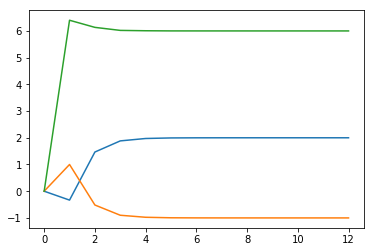

In [93]:
jacobi(M, 100, 0.000001)

array([-3.63124690e-02,  1.12808923e-03,  1.66238676e-02,  8.18944403e-02,
       -7.44680544e-02,  5.03262953e-02,  1.78983967e-04,  4.44250039e-02,
        1.15026133e-01,  1.83553106e-01])

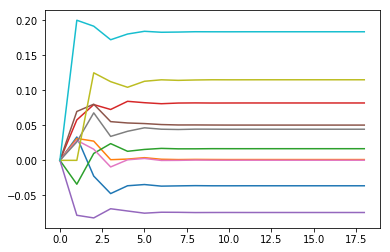

In [94]:
jacobi(big_matrix, 100, 0.000001)

array([1.20533417e+58, 2.08917767e+58, 8.53844989e+57])

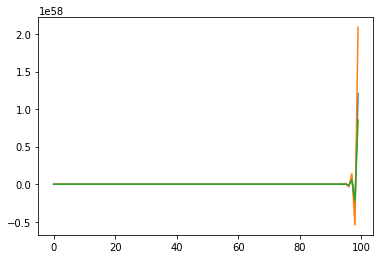

In [95]:
jacobi(A1, 100, 0.000001)

&#9989; <font color=red>**QUESTION:**</font>  What happens to the number of iterations if you increase ```e```?

The number of iterations will decrease with the increasing e

&#9989; <font color=red>**QUESTION:**</font>  What happens to the number of iterations if you decrease ```e```?

The number of iterations will increase with the decreasing e

---
# Step 4: Gauss-Seidel Method

Read the textbook on Section 7.4 of the textbook for the explaination of the Gauss-Seidel method.


&#9989; <font color=red>**DO THIS:**</font>  Write a solver for the system of equations using the Gauss-Seidel Method.    Call this function ```GaussSeidel```:

In [98]:
def GaussSeidel(m,numiter=100,e=0.000001):
    
    #Number of rows determins the number of variables
    numvars = m.shape[0]
    
    #construct array for final iterations
    history = np.zeros((numvars,numiter))
    i = 1
    while(i < numiter): #Loop for numiter
        
        for v in range(numvars): # Loop over all variables
            current = m[v,numvars] # Start with left hand side (augmented side of matrix)
            for col in range(numvars): #Loop over columns
                if col < v:
                    current = current - (m[v,col]*history[col, i])
                if col > v:
                    current = current -(m[v,col]*history[col, i-1])
            current = current/m[v,v] #divide by current variable coefficent
            
            history[v,i] = current #Add this answer to the rest
        if np.sum(np.abs(history[:,i]-history[:,i-1]))<=e:
            break
        i = i+1
        
                    
    #plot each variable
    for v in range(numvars):
        plt.plot(history[v,: i]);
    return history[:,i-1]

&#9989; <font color=red>**DO THIS:**</font>  Test your code on the three matrices we have developed so far:

array([ 1.99999988, -0.99999962,  5.9999999 ])

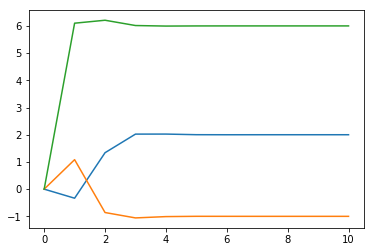

In [99]:
GaussSeidel(M, 100, 0.000001)

array([-3.63124745e-02,  1.12797098e-03,  1.66238648e-02,  8.18944744e-02,
       -7.44680891e-02,  5.03262724e-02,  1.78944955e-04,  4.44249719e-02,
        1.15026251e-01,  1.83553118e-01])

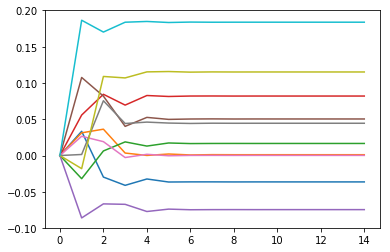

In [100]:
GaussSeidel(big_matrix, 100, 0.000001)

array([ 7.86357175e+32,  9.35992887e+32, -1.72235006e+33])

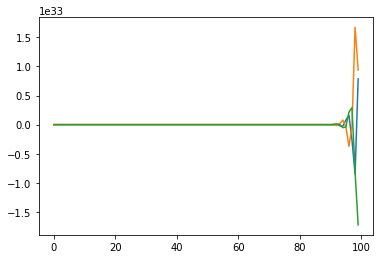

In [101]:
GaussSeidel(A1, 100, 0.000001)

&#9989; <font color=red>**QUESTION:**</font>  How are the approaches different? Which approach is better?  Why?

Jacobi method is just use only original number to estimate the value of x,y,z
But Gauss-Seidel not only use the original number but also use the second round's number to estimate.

So, the Gauss-Seidel method is a refinement of the Jacobi method. 
And also, Gauss-Seidel often have more rapid convergence. 

About the accuracy, Errors in Gauss-Seidel are only happened the final iteration. 
As a result, Gauss-Seidel is more accurate than Gaussian elimination in general. 

So, Gauss-Seidel is a better approach. 

&#9989; <font color=red>**DO THIS:**</font>  Before turning in your notebook, verify you have answered all the questions.  
- Use the Red/Bold (<font color=red>**QUESTION**</font> and <font color=red>**DO THIS**</font> )  text as a guild to where you will be evaluated. 
- The check mark symbols (&#9989;) are provided to help you keep track of what you have completed. Feel free to remove the check mark after completing each item. 
- Before submitting your document, clear and restart the Kernel and rerun the entire notebook. **THERE SHOULD BE NO ERRORS**



---------
### Congratulations, you're done with your Homework assignment!


Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).

&#169; Copyright 2018,  Michigan State University Board of Trustees